# Example 9-1: Generalized wind load of a suspension bridge
This example considers the suspension bridge below. We shall calculate the auto-spectral density of the generalized drag force due to the horizontal turbulence component $u$. The height and width of the girder is $D = 4.2$ m and $B = 15.5$ m respectively. We assume that the drag coefficient is $\bar{C}_D=0.63$. Also assume a mean wind velocity of $V = 38$ m/s and a turbulence intensity $I_u=0.15$. Use the auto-spectral density and the normalized co-spectral density defined in N400.

<img src="./figures/Fig_8_1.svg">

## Vibration modes
We assume that the horizontal vibration modes can be approximated as

$$\phi(y) \approx \sin \left(n\pi \frac{y}{L} \right) $$

Note that this is a crude approximation that is very inaccurate for higher modes. The vibration modes need, in general, to be solved by the finite element method.

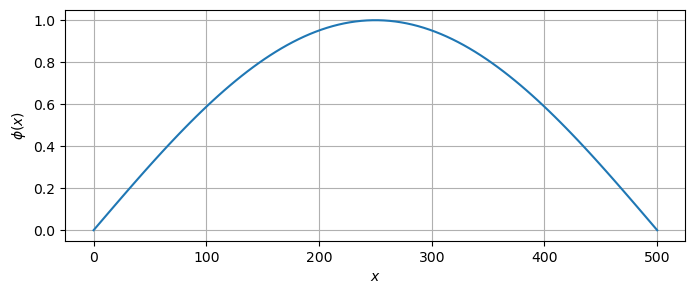

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
L = 500.0 # Bridge length
n = 1 # Mode shape number
y = np.linspace(0,L,100)
phi = np.sin(n*np.pi*y/L)

plt.figure(figsize=(8,3))
plt.plot(y,phi)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x)$');

## Auto-spectral density and normalized co-spectral density of the u component

The auto-spectral density of the turbulence is in N400, defined as

$$\frac{S_u(\omega)\omega}{\sigma_u^2} = \frac{ \frac{Au}{2\pi} \hat{\omega}_u}{\left(1+ 1.5 \frac{Au}{2\pi} \hat{\omega}_u  \right)^{\frac{5}{3}}} $$

Here $A_u = 6.8$.

The normalized co-spectral density is defined as

$$\hat{Co}(\omega,\Delta y) = \exp \left( -C_{uy} \frac{\omega \Delta y}{2 \pi V}  \right) $$

Here $C_{uy} = 10$

The co-spectral density of the u component as a function of the separation $\Delta y$ is then given as

$$Co_{uu}(\omega,\Delta y)=S_u(\omega) \hat{Co}(\omega,\Delta y)   $$

The cross-spectral density equals the sum of the co-spectral density (real part) and the quad-spectral density (imaginary part). In wind engineering, it is common practice to disregard the quad-spectral density when describing the wind field. The cross-spectral density is then given by

$$S_{uu}(\omega,\Delta y)\approx S_u(\omega) \hat{Co}(\omega,\Delta y)   $$

The figures below show the auto-spectral density and the cross-spectral density considering several separations. 

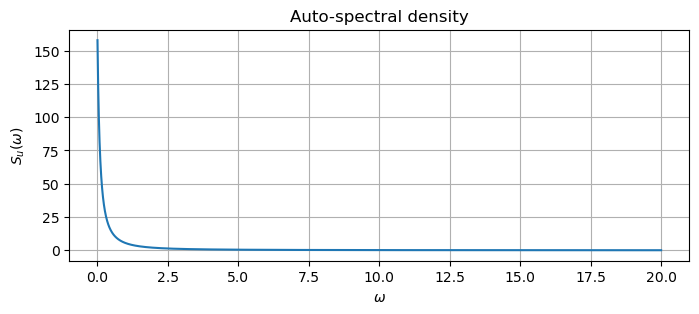

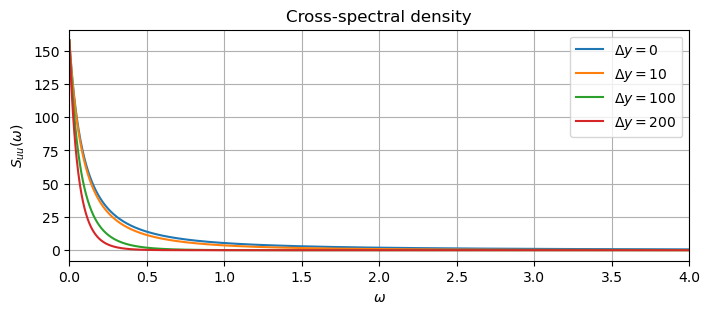

In [5]:
w = np.linspace(0,20,10000);
L1 = 100.0 # Reference integral length scale
z = 50.0 # Height above ground
xLu = L1*(z/10)**0.3 # Integral length scale
Au = 6.8/2/np.pi; # Constant in the auto-spectral density
V = 40.0;   #Mean wind velocity
Iu = 0.15;# Turbulence intensity
Cuy = 10.0; # Decay coeff
Su = (Iu*V)**2*Au*xLu/V/((1+1.5*Au*w*xLu/V)**(5.0/3.0));
# Plot auto spectral density  
plt.figure(figsize=(8,3))
plt.plot(w,Su,'-')    
plt.xlabel('$\omega$')
plt.ylabel('$S_u(\omega)$')
plt.title('Auto-spectral density')
plt.grid()

dy = np.array([0, 10, 100, 200])
plt.figure(figsize=(8,3))
for k in range(dy.shape[0]):
    Suu = Su * np.exp(-Cuy*w*dy[k]/2/np.pi/V)
    plt.plot(w,Suu,label = r'$\Delta y =$' + str(dy[k]))    
plt.xlabel('$\omega$')
plt.ylabel('$S_{uu}(\omega)$')
plt.xlim(0,4)
plt.title('Cross-spectral density')
plt.grid()
plt.legend();


The figure above illustrates that the low-frequency content is perfectly correlated along the entire span of the bridge. This observation is a significant shortcoming of the co-spectral density applied, and it results in a too high background response

## Auto-spectral density of the buffeting load

The distributed drag force is defined as

$$q_D(y,t) = \frac{1}{2}\rho V 2 D \bar{C}_D u(t,y) =\rho V D \bar{C}_D u(t,y)  $$

The generalized load is defined as

$$\bar{Q}(t) = \rho V D \bar{C}_D\int_{0}^{L} \phi(y)  u(t,y) dy  $$

The auto-correlation function is

$$ R_Q(t_1,t_2) = E\left[\bar{Q}(t_1) \bar{Q}(t_2) \right]  $$


$$ R_Q(t_1,t_2) = E\left[ \rho V D \bar{C}_D\int_{0}^{L} \phi(y_1)  u(t_1,y_1) dy_1  \rho V D \bar{C}_D\int_{0}^{L} \phi(y_2)  u(t_2,y_2) dy_2 \right]  $$

$$ R_Q(t_1,t_2) = \left(\rho V D \bar{C}_D \right)^2 E\left[ \int_{0}^{L} \int_{0}^{L} \phi(y_1)  u(t_1,y_1)    u(t_2,y_2) \phi(y_2)dy_1  dy_2 \right]  $$

We assume that the process is stationary such that we can express the auto-correlation as a function of $\tau = t_2-t_1$. We also assume that the process is homogeneous such that we can express the cross-correlation of the turbulence as a function of $\Delta y = y_2-y_1$. We can also move the expected value operator since it is only $u$ that is stochastic in the expression 

$$ R_Q(\tau) = \left(\rho V D \bar{C}_D \right)^2  \int_{0}^{L} \int_{0}^{L} \phi(y_1) E\left[ u(t,y)    u(t+\tau,y+\Delta y) \right] \phi(y_2)dy_1  dy_2  $$

We can then introduce the cross-correlation function of the turbulence $R_{uu}(\tau,\Delta y) = E\left[ u(t,y)    u(t+\tau,y+\Delta y) \right] $

$$ R_Q(\tau) = \left(\rho V D \bar{C}_D \right)^2  \int_{0}^{L} \int_{0}^{L} \phi(y_1) R_{uu}(\tau,\Delta y) \phi(y_2)dy_1  dy_2  $$

The auto-spectral density function is obtained by taking the Fourier transform of the auto-correlation function.

$$ S_{Q}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} R_{Q}(\tau) e^{-i\omega\tau} d\tau   $$


$$ S_Q(\omega) = \left(\rho V D \bar{C}_D \right)^2  \int_{0}^{L} \int_{0}^{L} \phi(y_1) S_{uu}(\omega,\Delta y) \phi(y_2)dy_1  dy_2  $$



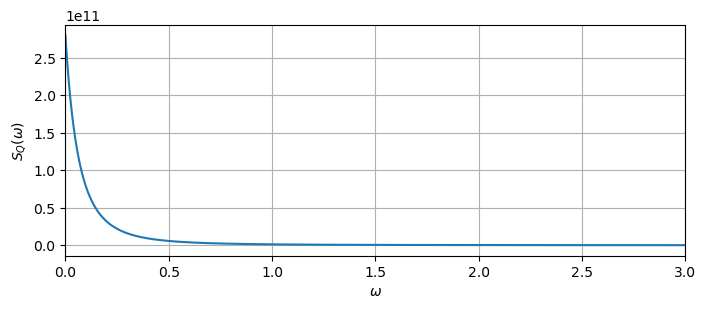

In [6]:
rho = 1.25 # Air density
D = 4.2 # Section height
C_D = 0.63 # Drag coefficient
dydy = np.array([y])-np.array([y]).T # Matrix of all possible dy combinations
SQ = np.zeros(w.shape[0])

for k in range(w.shape[0]):
    Suu = Su[k]*np.exp(-Cuy* np.abs(dydy)*w[k]/(2*np.pi*V) ) 
    integrand = np.array([phi]).T @ np.array([phi]) * Suu
    SQ[k] = (rho*V*D*C_D)**2*np.trapz(np.trapz(integrand,y),y)

plt.figure(figsize=(8,3))
plt.plot(w,SQ)
plt.xlim(0,3)
plt.xlabel('$\omega$')
plt.ylabel('$S_{Q}(\omega)$')
plt.grid()



## Illustration of the double integral
The figure below shows an illustration of the integrand for one selected frequency.

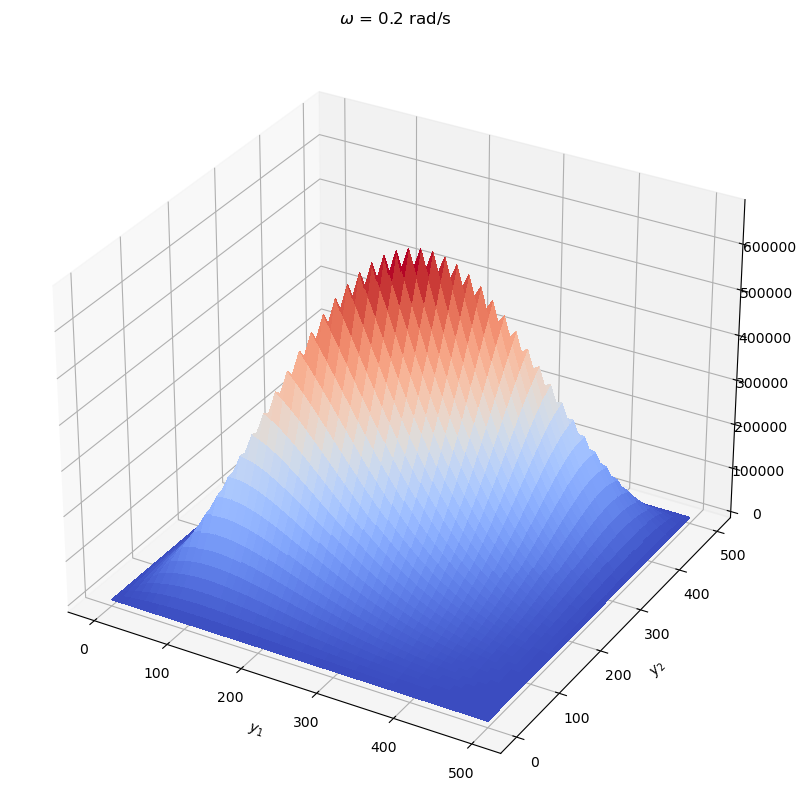

In [10]:
from matplotlib import cm

k = 100
Suu = Su[k]*np.exp(-Cuy* np.abs(dydy)*w[k]/(2*np.pi*V) ) 
integrand = np.array([phi]).T @ np.array([phi]) * Suu

y1p, y2p = np.meshgrid(y, y)
y3p = (rho*V*D*C_D)**2*integrand

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

surf = ax.plot_surface(y1p, y2p, y3p.T, cmap=cm.coolwarm,linewidth=0.1, antialiased=False)
ax.view_init(30,250)
ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$');
ax.set_title('$\omega$ = ' + str(1/100*np.around(100*w[k])) + ' rad/s');
